In [2]:
!pip install face_recognition

  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100564612 sha256=6e70a2d96546d6349e4b6bc11d7d6310c1f4f33147480ed19fa273c99e2099ba
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\6a\e1\1a\8969952b51c25409d5b96ecb09603de12b8534bd6d68e6e7d1
Successfully built face-recognition-models
You should consider upgrading via the 'c:\users\hp\anaconda3\envs\py36\python.exe -m pip install --upgrade pip' command.


In [3]:
import os
import glob

In [16]:
known_faces = []
known_names = []
known_faces_paths = []

registered_faces_path = 'registered/'
for name in os.listdir(registered_faces_path):
    images_mask = '%s%s/*.jpg' % (registered_faces_path, name)
    images_paths = glob.glob(images_mask) 
    known_faces_paths += images_paths
    known_names += [name for x in images_paths]


In [17]:
for name,images_path in zip(known_names, known_faces_paths):
    print('%s: %s' % (name, images_path))

elon: registered/elon\1.jpg
elon: registered/elon\2.jpg
elon: registered/elon\3.jpg
elon: registered/elon\4.jpg
elon: registered/elon\5.jpg
elon: registered/elon\8.jpg
mark: registered/mark\10.jpg
mark: registered/mark\2.jpg
mark: registered/mark\3.jpg
mark: registered/mark\4.jpg
mark: registered/mark\5.jpg
mark: registered/mark\6.jpg
mark: registered/mark\7.jpg


In [18]:
import face_recognition
def get_encodings(img_path):
    image = face_recognition.load_image_file(img_path)
    encoding = face_recognition.face_encodings(image)
    return encoding[0]

In [19]:
known_faces = [get_encodings(img_path) for img_path in known_faces_paths]

In [24]:
unknown_images = glob.glob('unknown/*.jpg')

In [27]:
import matplotlib.pyplot as plt

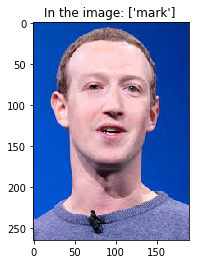

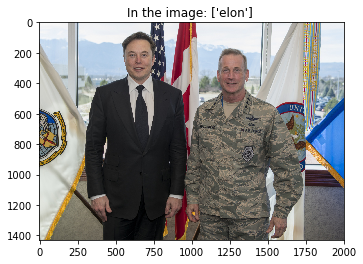

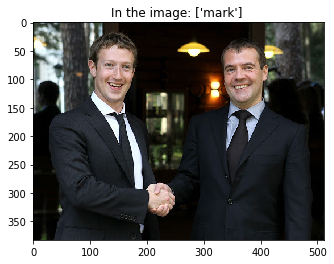

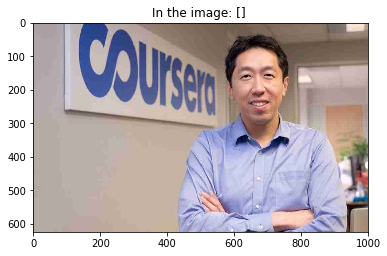

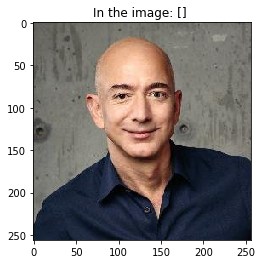

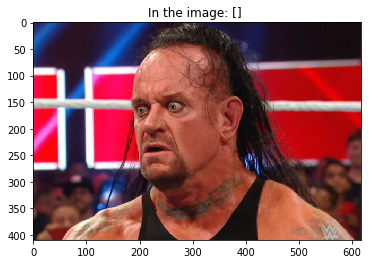

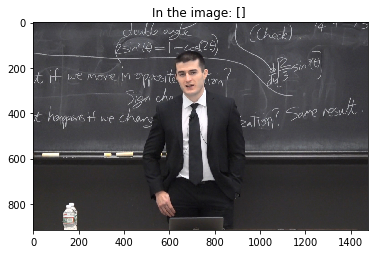

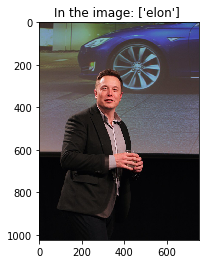

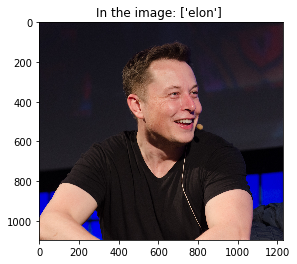

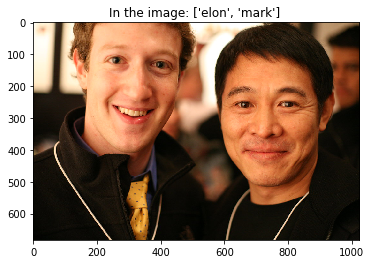

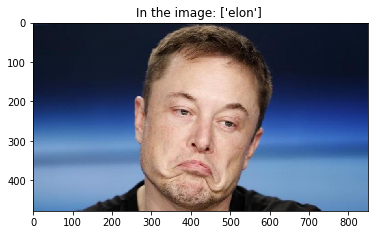

In [38]:
for img_path in unknown_images:
    img = plt.imread(img_path)
    plt.figure()
    plt.imshow(img)
    encodings = face_recognition.face_encodings(img)
    found_faces = []
    for face_code in encodings:
        results = face_recognition.compare_faces(known_faces, face_code, tolerance=0.6)
        if any(results):
            found_faces.append(known_names[results.index(True)])
        
    plt.title('In the image: %s ' % str(found_faces))
    